<a href="https://colab.research.google.com/github/EBNyame/Music-Popularity-Prediction/blob/main/Music_Popularity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Starting the Music Popularity Prediction task by importing the necessary libraries and the [dataset](https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset).**

In [2]:
import pandas as pd
spotify_data = pd.read_csv('Spotify_data.csv')

In [3]:
spotify_data.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [4]:
spotify_data.columns

Index(['Unnamed: 0', 'Track Name', 'Artists', 'Album Name', 'Album ID',
       'Track ID', 'Popularity', 'Release Date', 'Duration (ms)', 'Explicit',
       'External URLs', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo'],
      dtype='object')

**The dataset has an unnamed column so it has to go off**

In [5]:
spotify_data.drop(columns=['Unnamed: 0'], inplace=True)
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

**Now time for analysis. Since the popularity is the target variable, I  have to check the relationship between all the music features with popularity**

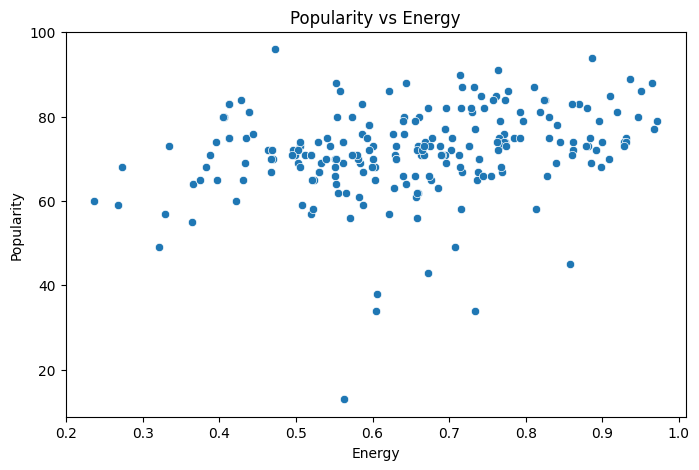

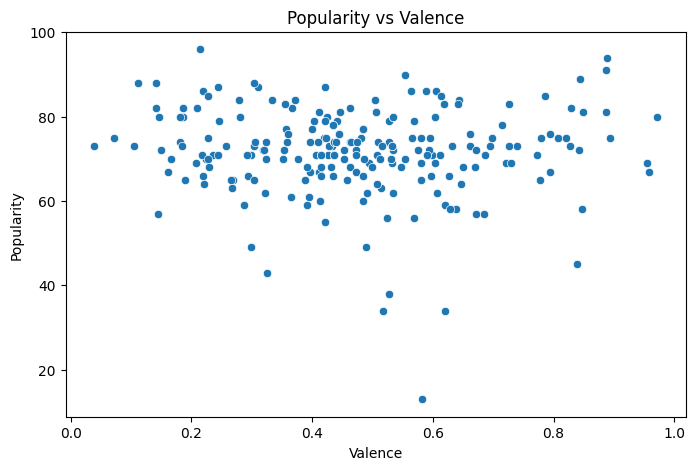

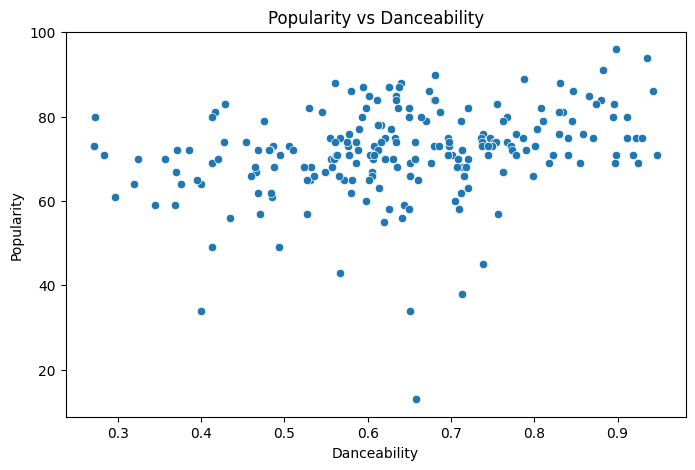

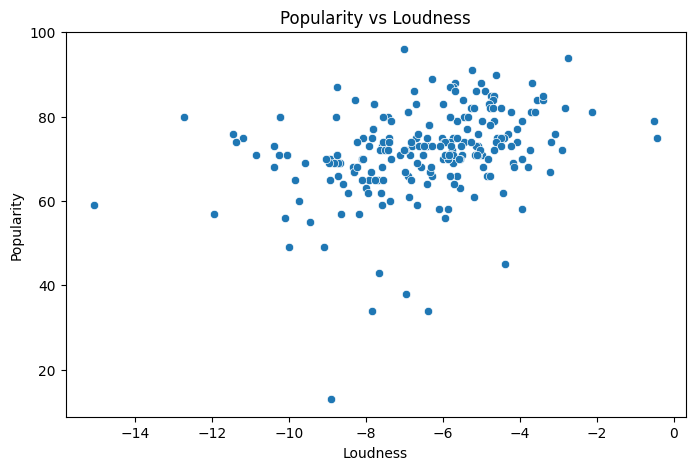

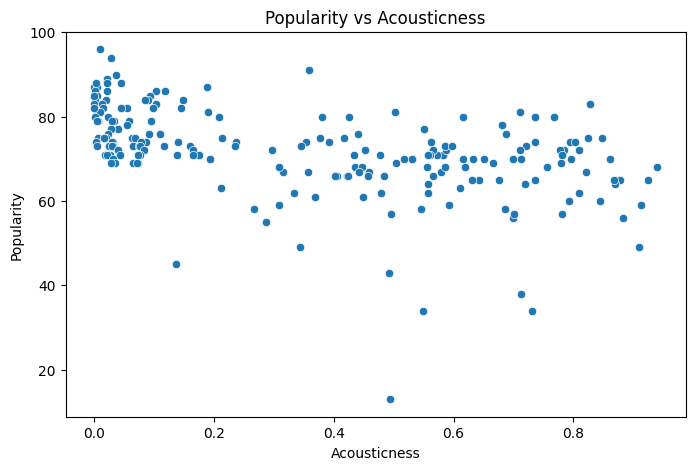

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']
for feature in features:
  plt.figure(figsize=(8, 5))
  sns.scatterplot(data=spotify_data, x=feature, y='Popularity')
  plt.title(f'Popularity vs {feature}')
  plt.show()

**From the visualizations, it has been observed that higher energy levels and danceability tend to correlate positively with higher popularity scores. Conversely, increased acountiness and lower loudness levels generally correspond with lower popularity, suggesting that more energetic and less acoustic tracks are favoured. Valence shows a weaker, less clear relationship with popularity, indicating that emotional positivity of a track alone doesnt strongly predict its popularity.**

**The correlation between all the features:**

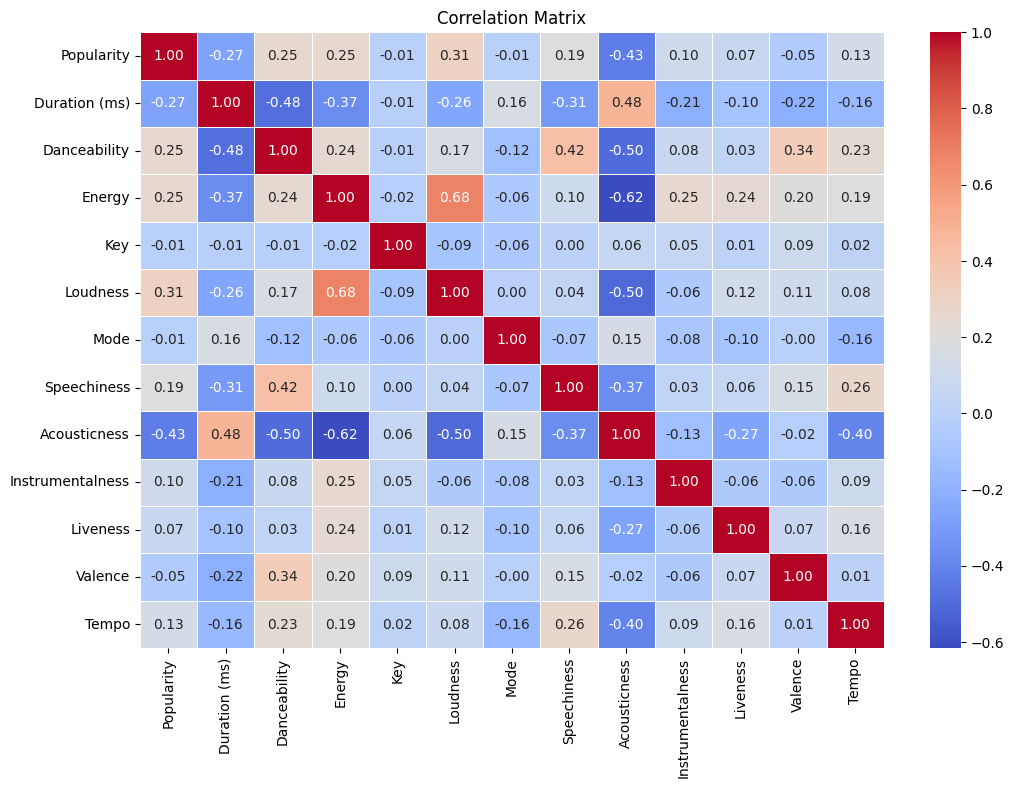

In [8]:
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = spotify_data[numeric_columns]

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**From the above correlation matrix, it vivid that popularity has a moderate positive correlation with loudness (0.31) and danceability (0.25), indicating that louder and more danceable tracks tend to be more popular. There's also a moderate negative correlation between popularity and acoustiness (-0.43), suggesting that racks with higher acousticness are generally less popular. Energy also has a positive correlation with popularity (0.25)**